In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
len(df)

11914

In [3]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [4]:
list(df.columns.values)

['make',
 'model',
 'year',
 'engine_fuel_type',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'driven_wheels',
 'number_of_doors',
 'market_category',
 'vehicle_size',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'msrp']

In [5]:
features = ['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'msrp']

In [6]:
df = df[features]
df.rename(columns={'msrp': 'price'}, inplace=True)
df.head().T

,0,1,2,3,4
make,BMW,BMW,BMW,BMW,BMW
model,1 Series M,1 Series,1 Series,1 Series,1 Series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
vehicle_style,Coupe,Convertible,Coupe,Coupe,Convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
price,46135,40650,36350,29450,34500


In [7]:
df.isnull().count()

make                 11914
model                11914
year                 11914
engine_hp            11914
engine_cylinders     11914
transmission_type    11914
vehicle_style        11914
highway_mpg          11914
city_mpg             11914
price                11914
dtype: int64

In [8]:
df.isnull().any(axis=0)

make                 False
model                False
year                 False
engine_hp             True
engine_cylinders      True
transmission_type    False
vehicle_style        False
highway_mpg          False
city_mpg             False
price                False
dtype: bool

In [9]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [10]:
df['engine_hp'] = df['engine_hp'].fillna(0)
df['engine_cylinders'] = df['engine_cylinders'].fillna(0)

In [11]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [12]:
mean_price = df['price'].mean()

In [13]:
above_average = (mean_price < df['price']).astype(int)
above_average

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: price, Length: 11914, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [17]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [18]:
above_average_train = (mean_price < df_train['price']).astype(int)
above_average_test = (mean_price < df_test['price']).astype(int)
above_average_val = (mean_price < df_val['price']).astype(int)

In [19]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [20]:
df_train_full = df_train_full.reset_index(drop=True)

In [21]:
above_average_train_full = (mean_price < df_train_full['price']).astype(int)

In [22]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['make', 'model', 'transmission_type', 'vehicle_style']

In [23]:
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)

## Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

    For each numerical variable, use it as score and compute AUC with the above_average variable
    Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

    engine_hp
    engine_cylinders
    highway_mpg
    city_mpg


In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
df_train.head().T

,0,1,2,3,4
make,Toyota,Chevrolet,Buick,Volkswagen,Dodge
model,Highlander Hybrid,Impala Limited,Regal,CC,Grand Caravan
year,2016,2014,2016,2015,2016
engine_hp,280.0,300.0,259.0,280.0,283.0
engine_cylinders,6.0,6.0,4.0,6.0,6.0
transmission_type,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATED_MANUAL,AUTOMATIC
vehicle_style,4dr SUV,Sedan,Sedan,Sedan,Passenger Minivan
highway_mpg,28,30,27,25,25
city_mpg,27,18,19,17,17
price,50485,26840,36490,43575,22595


In [26]:
numerical_columns

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

In [27]:
columns = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
for c in columns:
    auc = roc_auc_score(above_average_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(above_average_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

engine_hp, 0.917
engine_cylinders, 0.766
highway_mpg, 0.633
 city_mpg, 0.673


## Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)

    0.678
    0.779
    0.878
    0.979


In [28]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

%matplotlib inline

In [29]:
columns = categorical_columns + numerical_columns
columns

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'price']

In [30]:
train_dicts = df_train[columns].to_dict(orient='records')

In [31]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [32]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, above_average_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [33]:
val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [34]:
y_pred = model.predict_proba(X_val)[:, 1]

In [35]:
y_pred

array([9.99978482e-01, 1.81048333e-62, 3.48458596e-08, ...,
       7.36151038e-32, 1.00000000e+00, 1.22405754e-25])

In [36]:
roc_auc_score(above_average_val, -y_pred)

6.190493877601783e-06

## Question 3: Precision and Recall
Now let's compute precision and recall for our model.

    Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
    For each threshold, compute precision and recall
    Plot them

At which threshold precision and recall curves intersect?

    0.28
    0.48
    0.68
    0.88


In [39]:
thresholds = np.linspace(0, 1, 101)
thresholds, len(thresholds)

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 101)

In [40]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []
    
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [42]:
df_scores = confusion_matrix_dataframe(above_average_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,654,1729,0,0
10,0.1,654,19,0,1710
20,0.2,654,13,0,1716
30,0.3,654,4,0,1725
40,0.4,654,1,0,1728
50,0.5,649,1,5,1728
60,0.6,647,0,7,1729
70,0.7,645,0,9,1729
80,0.8,642,0,12,1729
90,0.9,637,0,17,1729


In [43]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)

In [44]:
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

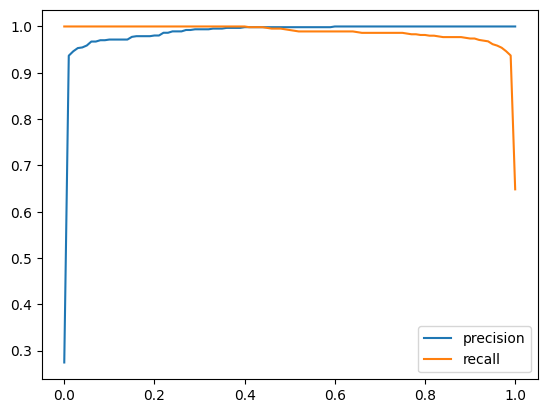

In [47]:
#@ INSPECTING THE CURVES:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.legend()
plt.show()

## Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- 0.52
- 0.72

In [48]:
df_scores['f1'] = 2*df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

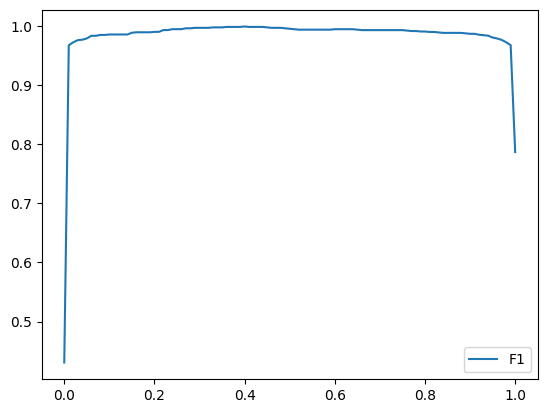

In [49]:
plt.plot(df_scores.threshold, df_scores.f1, label='F1')
plt.legend()
plt.show()

In [54]:
df_scores[['f1']].idxmax()

f1    40
dtype: int64

In [58]:
df_scores.iloc[40]

threshold       0.400000
tp            654.000000
fp              1.000000
fn              0.000000
tn           1728.000000
p               0.998473
r               1.000000
f1              0.999236
Name: 40, dtype: float64

## Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

- 0.003
- 0.030
- 0.090
- 0.140

In [66]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [74]:
def kfold_train(C = 1.0):
    scores = []

    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = (mean_price < df_train['price']).astype(int)
        y_val = (mean_price < df_val['price']).astype(int)

        dv, model = train(df_train, y_train, C=1.0)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('%.6f +- %.6f' % (np.mean(scores), np.std(scores)))

In [75]:
kfold_train()

0.999998 +- 0.000003


### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.01
- 0.1
- 0.5
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [76]:

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold_train(C)

0.999998 +- 0.000003
0.999998 +- 0.000003
0.999998 +- 0.000003
0.999998 +- 0.000003

